In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "/content/sample_data/glass.xlsx"
glass_df = pd.read_excel(file_path, sheet_name="glass")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

Summary Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000

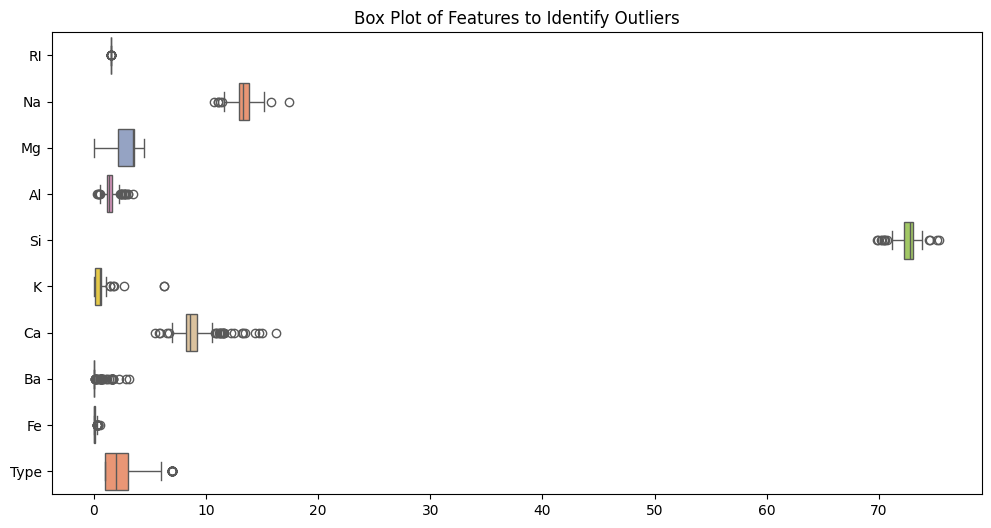

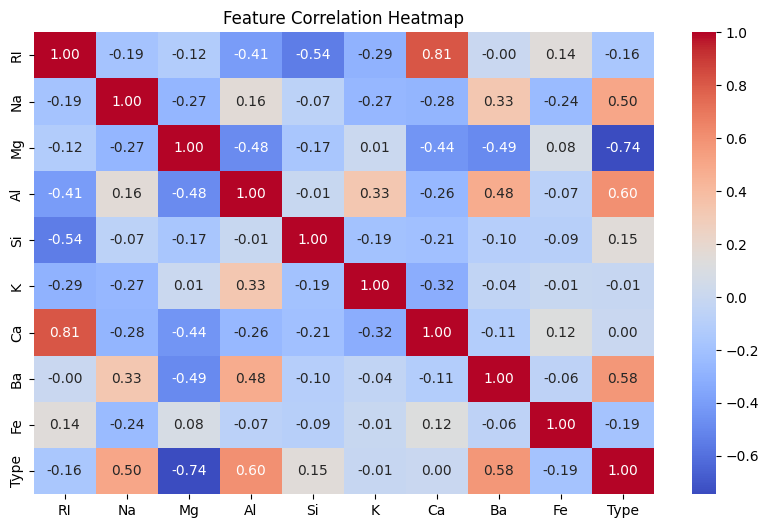

Random Forest Classifier Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43

Bagging Classifier Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.75      0.80      0.77        15
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy   

In [4]:
# EDA
print("Dataset Info:")
glass_df.info()
print("\nSummary Statistics:")
print(glass_df.describe())

plt.figure(figsize=(12, 6))
sns.boxplot(data=glass_df, orient="h", palette="Set2")
plt.title("Box Plot of Features to Identify Outliers")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(glass_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preprocessing
X = glass_df.drop(columns=["Type"])
y = glass_df["Type"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Classifier Report:\n", classification_report(y_test, y_pred_bagging, zero_division=1))

# Boosting (AdaBoost)
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
print("Boosting (AdaBoost) Classifier Report:\n", classification_report(y_test, y_pred_boosting, zero_division=1))


1. Explain Bagging and Boosting methods. How is it different from each other.

  Bagging and Boosting are ensemble learning techniques that enhance model performance by combining multiple classifiers, but they work in fundamentally different ways. Bagging involves training multiple models independently on different randomly drawn subsets of the original dataset and then aggregating their predictions, usually by averaging for regression or majority voting for classification. This helps reduce variance and prevents overfitting, making models like Random Forest highly effective. In contrast, Boosting builds models sequentially, where each model learns from the mistakes of the previous one by giving more weight to misclassified samples. This iterative correction process reduces bias and improves predictive accuracy, but it also increases the risk of overfitting if the number of estimators is too high.

2. Explain how to handle imbalance in the data.

  When dealing with imbalanced data, where one class significantly outnumbers others, several strategies can be applied to improve model performance. One common approach is oversampling the minority class using techniques like Synthetic Minority Over-sampling Technique, which generates synthetic samples to balance the dataset. Alternatively, undersampling the majority class can be used to create a more balanced distribution, though it risks losing valuable information. Another effective method is using class weighting, where misclassification penalties are adjusted to give higher importance to the minority class, as implemented through the class_weight="balanced" parameter in Scikit-Learn.Instead of relying on accuracy, evaluation metrics such as Precision, Recall, F1-score, and the Area Under the ROC Curve (AUC-ROC) should be prioritized to better assess model performance on imbalanced datasets.